# Feature selection for Multiple Linear Regression

Follow is an example of feature selection for multiple linear regression using statsmodel.

It is based on the Advertising Dataset, taken from the masterpiece book Introduction to Statistical Learning by Hastie, Witten, Tibhirani, James.
The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.

**Our aim is to find our which media (TV, radio and newspaper) contribute to the sales.**

In [1]:
import pandas as pd

# Read the csv
ad = pd.read_csv("Advertising.csv", index_col=0)

# Describe out dataset to get an rough idea about it
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [2]:
# Now let's take a look at some of it's elements
ad.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


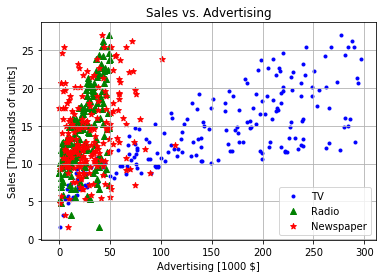

In [3]:
# Scatter plot

%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(ad.TV, ad.Sales, color='blue',  marker='.', label='TV')
plt.scatter(ad.Radio, ad.Sales, color='green', marker='^', label='Radio')
plt.scatter(ad.Newspaper, ad.Sales, color='red',  marker='*', label='Newspaper')

plt.legend(loc="lower right")
plt.title("Sales vs. Advertising")
plt.xlabel("Advertising [1000 $]")
plt.ylabel("Sales [Thousands of units]")
plt.grid()
plt.show()

In [4]:
# Let's see the correlation
ad.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


From the correlation, we can see that TV advt. has the most correlation with the sales and the newspaper has the lowest. We can visualize it by drawing a heat map. The lowest correlation is represented in lighter color whereas the higher in the darker ones. 

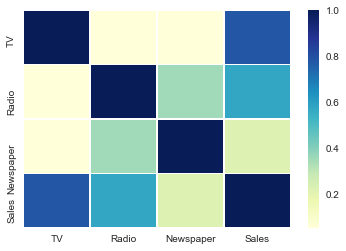

In [5]:
# Heatmap of the corelation 
import seaborn as sns
sns.set(style="white")
sns.heatmap(ad.corr(), linewidths=.5, cmap="YlGnBu")

Now we will use multiple linear regression model which gives an equation

$${Sales = \beta0 + \beta1*TV + \beta2*Radio + \beta3*Newspaper + \epsilon}$$

where Beta are the regression coefficients we want to find and epsilon is the error that we want to minimise.

In [6]:
import statsmodels.formula.api as sm

# fit the model for all the features
modelAll = sm.ols('Sales ~ TV + Radio + Newspaper', ad).fit()

# list the parameters
modelAll.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

The above coefficents can be interpreted as such,
<br>
<center>"_For spending additional 1000 $ on radio advertising leads to an increase in sales by approximately 189 units for a given amount of TV and Newspaper ad_"</center>

In [7]:
modelAll.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 09 Jul 2018   Prob (F-statistic):           1.58e-96
Time:                        17:49:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above table we can see that the confidence score is around 89.7. But is there anyway in which we can do better, maybe by dropping some features or atleast get the same confidence score. 
Let's first try to built models using single feature for all the features.

In [8]:
features = ['Sales ~ TV', 'Sales ~ Radio', 'Sales ~ Newspaper']

for feature in features:
    model = sm.ols(feature, ad).fit()
    print('R-squared of ' + feature + ' is ' + str(model.rsquared))

R-squared of Sales ~ TV is 0.611875050850071
R-squared of Sales ~ Radio is 0.33203245544529525
R-squared of Sales ~ Newspaper is 0.05212044544430516


As we can see our previous model was better then all of the above. Now let's take a look at the paramters again

In [9]:
# Print parameters
modelAll.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

We can see that the coefficient of Newspaper is very less which not providing any significant contribution to our model. So let's built a model without it.

In [10]:
# fit the model for all the features
modelTVRadio = sm.ols('Sales ~ TV + Radio', ad).fit()

# Summary
modelTVRadio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 09 Jul 2018   Prob (F-statistic):           4.83e-98
Time:                        17:49:48   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see from the above table that we get the same result as the previous model hence we can drop the newspaper feature and keep the other two.

So finally our model looks something like this
Sales = 0.19 Radio + 0.05 TV + 2.9 which we can write as:
0.19x + 0.05y - z + 2.9 = 0
Its normal is (0.19, 0.05, -1)
and a point on the plane is (-2.9/0.19,0,0) = (-15.26,0,0)

Let's plot the actual values as red points and our final model predictions as a cyan plane:

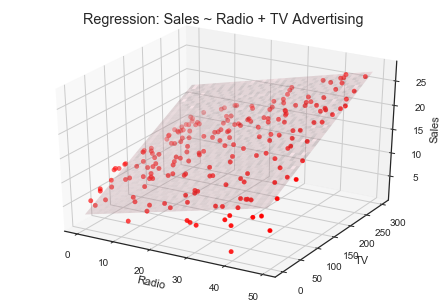

In [11]:
import numpy as np

# params: Sales = 0.19 Radio + 0.05 TV + 2.9
normal = np.array([0.19,0.05,-1])


point  = np.array([-15.26,0,0])
# a plane is a*x + b*y +c*z + d = 0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -np.sum(point*normal) # dot product
# create x,y
x, y = np.meshgrid(range(50), range(300))
# calculate corresponding z
z = (-normal[0]*x - normal[1]*y - d)*1./normal[2]



from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig.suptitle('Regression: Sales ~ Radio + TV Advertising')
ax = Axes3D(fig)

ax.set_xlabel('Radio')
ax.set_ylabel('TV')
ax.set_zlabel('Sales')
ax.scatter(ad.Radio, ad.TV, ad.Sales, c='red')

ax.plot_surface(x,y,z, color='pink', alpha=0.3)

Ref: <br>
[1] https://www.kaggle.com/mashimo/features-selection-for-multiple-linear-regression/notebook <br>